In [1]:
import pandas as pd
import random
gps_df = pd.read_csv('googleplaystore.csv')
gps_ur_df = pd.read_csv('googleplaystore_user_reviews.csv')

In [2]:
gps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
gps_df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [4]:
gps_df[gps_df.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [5]:
gps_df.loc[gps_df.Category == '1.9', gps_df.columns[2:]] = gps_df.loc[gps_df.Category == '1.9', gps_df.columns[1:-1]].values
gps_df.loc[gps_df.Category == '1.9','Genres'] = 'Photography'
gps_df.loc[gps_df.Category == '1.9','Category'] = 'PHOTOGRAPHY'

In [6]:
gps_df.iloc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                      PHOTOGRAPHY
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                        Photography
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [7]:
pd.set_option('display.max_rows', None)
apps_df = gps_df.App.value_counts()
apps_df[apps_df != 1]

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Bowmasters                                            6
Subway Surfers                                        6
Nick                                                  6
Temple Run 2                                          6
Helix Jump                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
MLB At Bat                                            5
MeetMe: Chat & Meet New People                  

In [8]:
# There are more than one ROBLOX with different number of reviews. Category must be GAME so 
# When I further examined these apps, I realised that category and genres can differ. So we can keep a random row 
# with the most common Category and Genres combination

gps_df[gps_df.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [9]:
for i in apps_df[apps_df != 1].index:
    
    df_app = gps_df[gps_df.App == i]

    index_list = df_app.index.tolist()

    df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')

    index_list.remove(random.choice(df_app[df_app.cat_gen == df_app.value_counts('cat_gen').idxmax()].index))

    gps_df = gps_df.drop(index_list)

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['cat_gen'] = df_app['Category'].str.cat(df_app['Genres'], sep='_')
C:\Users\alioz\AppData\Local\Temp\ipykernel_9048\3592267109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [11]:
gps_df.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [12]:
gps_df['Reviews'].str.isdigit().all()

True

In [13]:
gps_df[~((gps_df.Size.str.endswith('M')) | (gps_df.Size.str.endswith('k')) | (gps_df.Size == 'Varies with device'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [14]:
gps_df.loc[gps_df.Size.str.endswith('k'), 'Size'] = (gps_df.loc[gps_df.Size.str.endswith('k'), 'Size'].str[:-1].astype(float) / 1000).astype(str) + 'M'

In [15]:
# I think it is okay to keep the + since it indicates the range of installs
gps_df.Installs.value_counts()

1,000,000+        1416
100,000+          1111
10,000+           1032
10,000,000+        937
1,000+             889
100+               710
5,000,000+         608
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [16]:
gps_df.Price.value_counts()

0          8904
$0.99       145
$2.99       124
$1.99        73
$4.99        70
$3.99        57
$1.49        46
$5.99        26
$2.49        25
$9.99        19
$399.99      12
$6.99        11
$4.49         9
$14.99        9
$7.99         7
$3.49         7
$6.49         5
$8.99         5
$5.49         5
$19.99        5
$29.99        5
$12.99        4
$2.00         3
$1.00         3
$11.99        3
$24.99        3
$1.70         2
$7.49         2
$17.99        2
$13.99        2
$16.99        2
$39.99        2
$8.49         2
$10.99        2
$10.00        2
$1.96         1
$19.40        1
$2.60         1
$4.80         1
$2.59         1
$3.90         1
$4.59         1
$3.08         1
$154.99       1
$15.46        1
$3.04         1
$4.29         1
$2.90         1
$3.28         1
$4.60         1
$28.99        1
$2.95         1
$1.20         1
$1.97         1
$200.00       1
$89.99        1
$46.99        1
$2.56         1
$30.99        1
$3.61         1
$394.99       1
$1.26         1
$109.99 

In [17]:
gps_df.loc[gps_df.Price.str.startswith('$'), 'Price'] = gps_df[gps_df.Price.str.startswith('$')].Price.str[1:]
gps_df.Price = gps_df.Price.astype(float)

In [18]:
gps_df['Content Rating'].value_counts()

Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [18]:
gps_df['Current Ver'].value_counts()

Varies with device                                    1055
1.0                                                    798
1.1                                                    260
1.2                                                    176
2.0                                                    149
1.3                                                    140
1.0.0                                                  133
1.0.1                                                  115
1.4                                                     87
1.5                                                     80
1.0.2                                                   79
1.6                                                     64
1.0.3                                                   61
2.1                                                     59
3.0                                                     58
1.0.4                                                   56
1.7                                                     

In [19]:
gps_df[gps_df['Current Ver'] == 'Android 2.0 - 2014']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10669,Pistolet FN GP35 expliqué,BOOKS_AND_REFERENCE,NaN,2,7.9M,5+,Paid,5.99,Everyone,Books & Reference,"August 19, 2014",Android 2.0 - 2014,1.6 and up
10674,Pistolet FN 1906 expliqué,BOOKS_AND_REFERENCE,NaN,0,5.2M,10+,Paid,5.49,Everyone,Books & Reference,"August 17, 2014",Android 2.0 - 2014,1.6 and up


In [20]:
gps_df[gps_df['Current Ver'] == '20180609']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2169,All-in-One Mahjong 3 FREE,FAMILY,4.5,566,17M,"50,000+",Free,0.00,Everyone,Board;Brain Games,"June 13, 2018",20180609,4.0 and up
2171,All-in-One Mahjong 3,FAMILY,4.4,38,16M,100+,Paid,0.99,Everyone,Board;Brain Games,"June 14, 2018",20180609,4.0 and up


In [21]:
gps_df[gps_df['Current Ver'] == 'opciÃ³n de cerrar']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7140,Cádiz CB Gades,SPORTS,NaN,1,3.8M,10+,Free,0.0,Everyone,Sports,"August 5, 2018",opciÃ³n de cerrar,4.1 and up


In [22]:
# I don't know what to do with these Current Ver so I will keep them as is.

In [23]:
gps_df['Android Ver'].value_counts()

4.1 and up            2203
4.0.3 and up          1395
4.0 and up            1287
Varies with device     990
4.4 and up             818
2.3 and up             615
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             230
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [24]:
gps_df[gps_df.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0.00,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0.00,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0.00,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0.00,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0.00,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0.00,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0.00,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0.00,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0.00,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0.00,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In [25]:
gps_df['Rating'] = gps_df['Rating'].astype(float)

In [26]:
gps_df['Rating'] = gps_df.groupby('Category')['Rating'].apply(lambda x: x.fillna(x.mean()))

In [27]:
gps_df[gps_df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.182002,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [28]:
gps_df.loc[(gps_df.Type.isnull()) & (gps_df.Price == 0 ), 'Type'] = 'Free'

In [29]:
gps_df['Genres'].value_counts()

Tools                                    826
Entertainment                            561
Education                                510
Business                                 420
Medical                                  395
Personalization                          376
Productivity                             374
Lifestyle                                368
Finance                                  345
Sports                                   331
Communication                            315
Action                                   299
Health & Fitness                         288
Photography                              282
News & Magazines                         254
Social                                   239
Books & Reference                        222
Travel & Local                           218
Shopping                                 202
Simulation                               193
Arcade                                   184
Dating                                   171
Casual    

In [30]:
# I don't know how to interpolate current ver.
gps_df[gps_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,2.7M,"5,000+",Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,0.011M,"1,000,000+",Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,8.7M,"500,000+",Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.182002,0,0.222M,100+,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179,14M,"50,000+",Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.182002,44,7.2M,"10,000+",Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.039554,1,0.237M,10+,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.344970,8,0.658M,"1,000+",Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [31]:
gps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [32]:
gps_df.App = gps_df.App.astype(str)
gps_df.Category = gps_df.Category.astype(str)
gps_df.Reviews = gps_df.Reviews.astype(int)
gps_df.Size = gps_df.Size.astype(str)
gps_df.Installs = gps_df.Installs.astype(str)
gps_df.Type = gps_df.Type.astype(str)
gps_df['Content Rating'] = gps_df['Content Rating'].astype(str)
gps_df.Genres = gps_df.Genres.astype(str)

In [33]:
gps_df['Last Updated'] = pd.to_datetime(gps_df['Last Updated'])

In [ ]:
gps_ur_df = gps_ur_df[gps_ur_df.Translated_Review.notnull()]

In [36]:
gps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


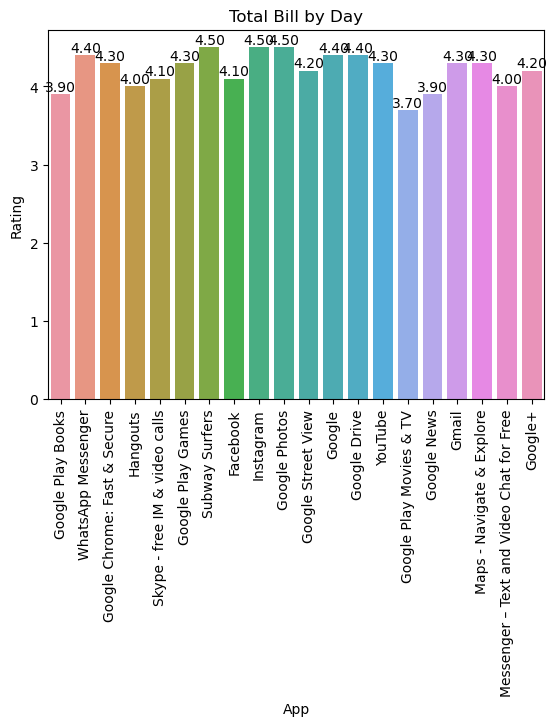

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x="App", y="Rating", data=gps_df[gps_df.Installs == '1,000,000,000+'])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(), 
            '{:.2f}'.format(p.get_height()), 
            ha='center', 
            va='bottom')

# Set title and rotate x-tick labels
ax.set_title("Total Bill by Day")
plt.xticks(rotation=90)

plt.show()